# ODE Integration
$\newcommand{\vec}[1]{{\bf #1}}$
$\newcommand{\ee}{\end{eqnarray}}$


## Euler's Method

Consider the following first order ordinary differential equation.
$$
\frac {d\vec{y}}{dt} = \vec{f}(\vec{y}, t),
$$
where $\vec{y}$ is a vector of variables, $t$ is the independent variable, and $\vec{f}$ is some arbitrary vector function of $\vec{y}$ and $t$.  We can use our definition of derivative to write: 
$$
\frac {d\vec{y}}{dt} \approx \frac {\vec{y}_{i+1} - \vec{y}_i}{\Delta t} = \vec{f}(\vec{y}_i, t_i),\label{eq:explicit}
$$
where $\Delta t = t_{i+1} - t_i$.  This is not the only choice that could have been made, it is also possible to write it as 
$$
\frac {\vec{y}_{i+1} - \vec{y}_i}{\Delta t} = \vec{f}(\vec{y}_{i+1}, t_{i+1}). \label{eq:implicit}
$$
The difference between these two is the choice of either $t_{i}$ or $t_{i+1}$ on the right hand side.  Equation (\ref{eq:implicit}) gives rise to implicit methods which are harder to code up, but offers potentially greater stability and speed.  Instead, we will focus on equation (\ref{eq:explicit}).  

If we know the value at $\vec{y}(t_i)$, we can solve for $\vec{y}(t_{i+1})$ to be
$$
\vec{y}_{i+1} = \vec{y}_i + \vec{f}(\vec{y}_i, t_i)\Delta t.\label{eq:euler method}
$$
This method is known as Euler's method.  As an aside, it we take $\vec{f}$ to be a scalar function of just $t$, then it just becomes an ordinary integral.  Hence, the methodology we describe here is directly relevant for numerical integration so we don't need a separate discussion for it.

Equation (\ref{eq:euler method}) gives the correct answer for $\Delta t \rightarrow 0$, but it should never be used solving any equations you code up on a computer as superior methods abound\footnote{Of course in the movie Hidden Figures, the lead protagonist uses Euler's method to ensure that John Glenn lands safely. Then again the computer was a human being.}.  To see why Euler's method is not recommended, let consider the error that this algorithm introduces for finite $\Delta t$.  We do a Taylor expansion of the true solution, $\vec{y}(t)$:
$$
\vec{y}_{i+1} \approx \vec{y}_i + \frac{d\vec{y}}{d t}(t_i)\Delta t + \frac 1 2 \frac{d^2\vec{y}}{d t^2}(t_i)\Delta t^2 + \mathcal{O}(\Delta t^3)
$$
The first two terms constitute Euler's method, so for each time step, we will accumulate an error that is proportional to $\Delta t^2$.  Since the number of steps over an interval $T$ goes like $T/\Delta t$, then the total error scales like $1/\Delta t$.  So for sufficiently small $\Delta t$, then the error is reduced, but it comes at the cost of lots of steps.  Because of the scaling with error, Euler's method is known as a first-order method.  To get better results we want scaling that reduces the error as much as possible. 

As an example, lets consider the equation 
$$
\frac {dy}{dt} = \cos(t).
$$
We can see that we can solve this analytically by noting
$$
y(t) = \int\cos(t) dt = \sin(t) + C,
$$
where $C$ is a constant.  Let see how we can do this numerically. First we define a function for the derivatives

In [1]:
import numpy as np

# implement the integrand above.
def derivatives( t, y) : 
    pass

Now you might wonder about the second variable in the derivatives function. We shall return to this shortly. Now let us define the Euler method.  
$$
y(t+\Delta t) = y(t) + \frac{dy}{dt}(t,y(t))\Delta t
$$

In [2]:
#implement the euler's method as using dy/dt as defined by derivatives.  derivatives has the same signature as above.

def euler(derivatives, t, delta_t, y) :
    pass

Note that the euler function above follows the exact definition of euler's method as defined above.  Now lets drive this between $t=0$ and $t=100$

In [7]:
def run_euler(N=1000, t0=0, t1=100) :
    delta_t = (t1-t0)/N
    y = 1

    t_array = np.arange(t0,t1+delta_t,delta_t)
    y_array = np.zeros(t_array.size)

    y_array[0] = y
    for i in range(t_array.size-1):
        y_array[i+1] = euler(derivatives, t_array[i], delta_t, y_array[i])
    return t_array, y_array

Great.  Now lets plot this

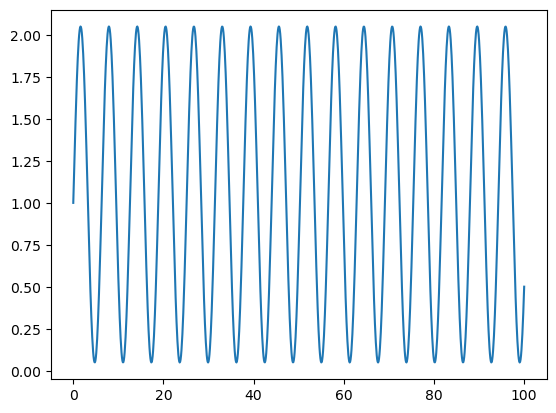

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt

t_array, y_array = run_euler()
plt.plot(t_array, y_array)
plt.show()


## Runge-Kutta 2 step (RK2)

Euler's method is beautifully simple, elegant, and not that accurate.  There are much better methods abound, mainly ones that are much more accurate.  There is a slightly more complicated method that can give much better answers.

Runge-Kutta methods are an example of predictor-corrector methods.  That is, it "predicts" the value at $\vec{y}_{i+1}$ from the current solution at $\vec{y}_i$.  Using this predicted value, it performs a "corrector" step to increase the accuracy of the solution.  The generic two-step Runge-Kutta method is as follows:
$$
\vec{k}_1 = \Delta t \vec{f}(\vec{y}_i, t_i) 
$$
$$
\vec{k}_2 = \Delta t \vec{f}(\vec{y}_i + \beta \vec{k}_1, t_i + \alpha \Delta t) 
$$
$$
\vec{y}_{i+1} = \vec{y}_i + a \vec{k}_1 + b \vec{k}_2
$$
where $\vec{k}_1$ is the "predictor" and is the same as an Euler step, $\vec{k}_2$ is the "corrector", and the $i+1$ step is some linear combination of the two.  The constants, $\alpha$, $\beta$, $a$, and $b$ are chosen to make the entire algoritm accurate to $\mathcal{O}(\Delta t^3)$.  To determine these unknown constants, let perform a Taylor expansion of $\vec{y}_{i+1}$
$$
\vec{y}_{i+1} = \vec{y}_i + \frac{d\vec{y}}{d t}(t_i)\Delta t + \frac 1 2 \frac{d^2\vec{y}}{dt^2}(t_i)\Delta t^2
$$
Now 
$$
\frac{d^2\vec{y}}{dt^2}(t_i) = \frac {d\vec{f}(\vec{y},t)}{dt} = \frac {\partial \vec{f}(\vec{y},t)}{\partial t} + \frac{d\vec{y}}{dt}\cdot\vec{\nabla}_{\vec{y}}\vec{f} 
$$
$$
= \frac {\partial \vec{f}(\vec{y},t)}{\partial t} + \vec{f}\cdot\vec{\nabla}_{\vec{y}}\vec{f}
$$  
Thus we have 
$$
\vec{y}_{i+1} = \vec{y}_i + \vec{f}(\vec{y}_i, t_i)\Delta t + \frac 1 2 \left(\frac {\partial \vec{f}(\vec{y}_i,t_i)}{\partial t} + \vec{f}(\vec{y}_i,t_i)\cdot\vec{\nabla}_{\vec{y}}\vec{f}(\vec{y}_i,t_i)\right)\Delta t^2 +\mathcal{O}(\Delta t^3)\label{eq:2nd order}
$$
Now we Taylor expand out $\vec{k}_2$ to find
$$
\vec{k}_2 = \Delta t \vec{f}(\vec{y}_i + \beta \vec{k}_1, t_i + \alpha \Delta t) 
$$
$$
= \Delta t\left( \vec{f}(\vec{y}_i, t_i) + \alpha\Delta t\frac {\partial \vec{f}(\vec{y}_i,t_i)}{\partial t} + \beta\Delta t \vec{f}\cdot\vec{\nabla}_{\vec{y}}\vec{f}(\vec{y}_i,t_i)\right)
$$
Putting this all together, we have 
$$
\vec{y}_{i+1} = \vec{y}_i + (a+b)\Delta t \vec{f}(\vec{y}_i, t_i) + b\Delta t^2\left(\alpha\frac {\partial \vec{f}(\vec{y}_i,t_i)}{\partial t} + \beta\vec{f}\cdot\vec{\nabla}_{\vec{y}}\vec{f}(\vec{y}_i,t_i) \right)+\mathcal{O}(\Delta t^3)\label{eq:rk2 expansion}
$$
Comparing Equations (\ref{eq:2nd order}) and (\ref{eq:rk2 expansion}), we get the following conditions:
$$
a+b = 1 \qquad b\alpha = \frac 1 2 \qquad b\beta = \frac 1 2,
$$
or 3 equation for 4 unknowns.  So that mean there exist a infinite number of second order schemes that are possible, e.g., error per step that goes likes $\Delta t^3$, so the total error over an interval goes like $\Delta t^2$.  So using $\alpha$ as a parameter, we have 
$$
\beta = \alpha \qquad b = \frac 1 {2\alpha} \qquad a = 1 - \frac 1 {2\alpha}
$$
So a generic second order Runge-Kutta scheme is then
$$
\vec{k}_1 = \Delta t \vec{f}(\vec{y}_i, t_i)
$$
$$
\vec{k}_2 = \Delta t \vec{f}(\vec{y}_i + \alpha \vec{k}_1, t_i + \alpha \Delta t) 
$$
$$
\vec{y}_{i+1} = \vec{y}_i + \left(1 - \frac 1 {2\alpha}\right) \vec{k}_1 + \frac {\vec{k}_2} {2\alpha} 
$$

A few famous examples are 
1. Midpoint method: $\alpha = 1/2$ Estimate the values of y at the midpoint and solve for the derivative at the midpoint.  Use this midpoint derivative to complete the integration.  Note that prefactor in front of $\vec{k}_1$ in this case is zero.
2. Heun's Method: $\alpha = 1$ Estimate the values of y at the endpoint and give equal weight to both starting and endpoints to compute the derivative.

Lets implement the midpoint method.  We will keep it more general


In [ ]:
# implement rk2.  derivatives have the signature derivatives(t,y) as above
def rk2(derivatives, t, dt, y) : 
    pass

def run_rk2(N=1000, t0=0, t1=100):
    dt = (t1-t0)/N
    y = 0
    t_array = np.arange(t0,t1+dt,dt)
    y_array = np.zeros(t_array.size)

    y_array[0] = y
    for i in range(t_array.size-1):
        y_array[i+1] = rk2(derivatives, t_array[i], dt, y_array[i])
    return t_array, y_array

import matplotlib.pyplot as plt

t_array, y_array = run_rk2()
plt.plot(t_array, y_array)
plt.show()


## Using Scipy integrate

Now it seems quaint to roll your own routines, but they are relatively simple to implement.  However for the most part, you want to use scipy.integrate.ode for this stuff.

Let use the same example:


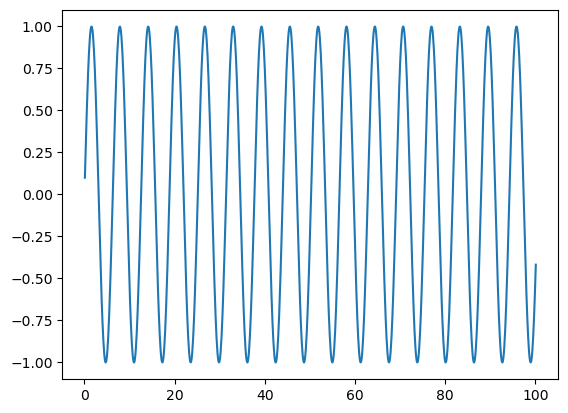

In [9]:
import scipy.integrate as si

# set up RK5
integrator = si.ode(derivatives).set_integrator("dopri5")
N = 1000
#set up initial conditions
y0 = np.zeros(1)
t0 = 0
t1 = 100
dt = (t1-t0)/N
integrator.set_initial_value(y0, t0)


y_array = []
t_array = []
while integrator.successful() and integrator.t < t1 : 
    integrator.integrate(integrator.t+dt)
    t_array.append(integrator.t)
    y_array.append(integrator.y)
    
plt.plot(t_array, y_array)
plt.show()
    

## Timestepping

One thing that we have not discussed is the choice for $\Delta t$.  For an interval between $t_0$ and $t_1$, a larger $\Delta t$ results in fewer computational steps, which makes things faster.  However, a smaller $\Delta t$ results in greater accuracy.  There is a limit with higher order methods on how accurate you can make a solution.  

But there is another subtle issue that can happen.  In many instances the right hand side of an ODE can take on large (positive or negative) values for a limited set of circumstances.  In these cases, it is useful to have a variable $\Delta t$ -- small when things change quickly and large when things change slowly.  How can we estimate when these occurs.  

Suppose you have an ODE of the form
$$
\frac{\partial y}{\partial t} = f(y,t)
$$
Then according to Euler's method we have
$$
y_{n+1} - y_n = f(y_n,t_n)\Delta t
$$
Now suppose we want the change in $\Delta y = |y_{n+1} - y_n| < \alpha |y_n|$.  This means that
$$
\alpha |y_n| = |f(y_n,t_n)|\Delta t_{\rm max}
$$
This allows us to solve for $\Delta t_{\rm max}$ to be
$$
\Delta t_{\rm max} = \alpha \left|\frac{y_n}{f(y_n,t_n)}\right|
$$
Typically, you don't want $\alpha$ to be too large nor too small.  I have found values between 0.01 and 0.1 to work well.  

At the same time, we don't want to miss something if $\Delta t_{\rm max}$ is too large that it totally misses a change.  In this case, I like to pick a $\Delta t_{\rm max,0} = (t_1 - t_0)/N_0$, where $N_0$ is a number between 10 or 100, but this can change as well.

So a selection for $\Delta t$ at a time $t$ would be
$$
\Delta t = \min( t_1 - t, \min(\Delta t_{\rm max,0}, \Delta t_{\rm max}))
$$

Now lets try an example of this. Consider the ODE
$$
\frac{\partial y}{\partial t} = \frac 1 {\sigma} \exp\left(-\frac{t^2}{\sigma^2}\right)
$$
You probably recognize the answer to this one.  Integrated from $t=-\infty$ to $\infty$, it is $\sqrt{\pi}$ or $\sqrt{2\pi}$. I forget

Now lets try to do this numerically.  First we define the derivatives

In [ ]:
def derivatives_gaussian( t, y, sigma=0.1) :
    if( np.abs(t/sigma) > 10 ) : # this is to prevent overflows that can happen for large exp(-t^2/sigma^2)
         return 0.
    return np.exp(-t**2/sigma**2)/sigma

def timestep(derivatives, t, y, dt0, alpha=0.01) : # compute the timestep -- implement this
    pass

def run_gaussian(t0=-10, t1=10, N0 = 100) : 
    y = 0
    t = t0
    dt0 = (t1 - t0)/N
    while t < t1 :
        dt = timestep(derivatives_gaussian, t, y, dt0)
        y = rk2(derivatives_guassian, t, dt, y)
        t += dt
        
    print( f"End result is {y}")

    

## Higher Order ODEs

Thus far we have discussed the case of first order odes.  What about higher order ODEs.  It turns out that there is a very simple extension to arbitrary high order ODEs.  The trick is it identify higher order derivatives as variables in themselves.  Consider the ODE
$$
\sum_n^N\frac{d^n f}{dx^n} = 0
$$
We can write this as a sum first order ODEs by the identification of 
$$
f_i = \frac{df_{i-1}}{dx} \qquad\textrm{and}\qquad f_0 = f
$$
Thus we have 
$$
\frac{df_{N-1}}{dx} + \sum_i^{N-1} f_i = 0,
$$
$$
\frac{df}{dx} = f_1
$$
$$
\frac{df_1}{dx} = f_2
$$
$$
 . . . .
$$
$$
\frac{df_{N-2}}{dx} = f_{N-1}.
$$
So this converts a Nth order ODE to N first order ODEs, which we can solve.

As an example lets try a simple harmonic oscillator 
$$
\frac{d^2 x}{dt^2} = -x
$$
We of course know that the solution is 
$$
x(t) = A\cos(t+\phi)
$$

This is second order so we break this up into 2 first order equations
$$
\frac{dx}{dt} = v
$$
$$
\frac{dv}{dt} = -x
$$
Now lets implement this numerically.

In [ ]:
#implement the SHO derivative as 2 first order equations
def SHO_derivatives(t,y) :
    x = y[0]
    v = y[1]
    pass 

In [ ]:
def run_SHO_rk2(t,delta_t) :
    y = np.zeros(2)
    y[0] = 1 # set initial condition
    t1 = 0
    while t1 < t : 
        delta_t = min(t-t1,delta_t)
        # implement the rk2 step function
        pass
    return y

from matplotlib.animation import FuncAnimation
from IPython import display 

fig, ax = plt.subplots()

def animate(i):
    ax.clear()
    # Get the point from the points list at index i
    delta_t = 0.05
    y = run_SHO_rk2(i*delta_t, delta_t)
    ax.plot(y[0], 0., color='green', marker='o')
    # Set the x and y axis to display a fixed range
    ax.set_xlim([-1.2, 1.2])
    ax.set_ylim([-1,1])
ani = FuncAnimation(fig, animate, frames=250, interval=20, repeat=False)
video = ani.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()


Now challenge problem.  Let's consider a very classic problem from astronomy.  Two massive bodies interacting gravitationally.  The force is a 3-d force which is defined by
$$
F = -\frac{M_1 M_2}{r^2}
$$
we will scale out newton's constant, $G$, here. Suppose you have two bodies.  Go ahead and implement the derivatives and run it.  It should look like two bodies orbiting each other.

In [ ]:
N_bodies = 2
M = np.array([1.0, 0.25])

# given N bodies, implement the force equations as stated above.
def Nbody_derivatives(t,y) :
    pass
    
# some simple initial conditions
def initial_conditions() : 
    pos_and_vel = np.zeros([N_bodies,6])

    pos_and_vel[0,0] = -1
    pos_and_vel[0,4] = -0.25
    pos_and_vel[1,0] = 1
    pos_and_vel[1,4] = 0.25
    return pos_and_vel

def run_Nbody_rk2(tend,tframe,dt) :
    pos_and_vel = initial_conditions()
    y = pos_and_vel
    t = 0
    tnext = tframe
    positions = []
    while t<tend :
        while t < tnext :
            delta_t = min(tnext-t,dt)
            # compute using rk2
        positions.append(pos_and_vel[:,0:3].copy())
        tnext += tframe
    return positions

fig, ax = plt.subplots(1, 1)
frames =100
tframe = 0.25
dt = 0.025

positions = run_Nbody_rk2(frames*tframe, tframe, dt)

def animate(i, positions):
    ax.clear()
    # Get the point from the points list at index i
    pos = positions[i]
    ax.scatter(pos[:,0], pos[:,1], color='green', marker='o')
    # Set the x and y axis to display a fixed range
    ax.set_xlim([-5, 5])
    ax.set_ylim([-5,5])
ani = FuncAnimation(fig, lambda i : animate(i, positions), frames=len(positions), interval=50, repeat=False)
video = ani.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()
